## 6.2 Exploring Relationships

### This script will contain the following:

#### Importing Libraries
#### Importing Clean Dataframes
#### Check Dataframes
#### Exploring Relationships
#### Revisiting Questions
#### Hypotheses
#### Export Dataframe

# 01. Import Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# 02. Import Clean Dataframes

In [3]:
# Path Creation
path = r'/Users/tyrasmussen/Desktop/08-2023 UFC Analysis'

In [4]:
# Import 'fight_merged' dataframe
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'fight_merged.pkl'))

In [5]:
# Import 'fighter_additional' dataframe
df_additional = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'fighter_additional.pkl'))

# 03. Check Imported Dataframes

In [6]:
# Display all results
pd.options.display.max_rows = None

In [7]:
df_merged.head()

,R_fighter,B_fighter,Referee_x,date_x,location,Winner_x,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,last_round_time,Format,Referee_y,date_y,Year,City,State,Country,Fight_type,Winner_y
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000000,0.000,...,0:27,3 Rnd (5-5-5),Chris Tognoni,20-Mar,2021,Las Vegas,Nevada,USA,Bantamweight Bout,Adrian Yanez
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500000,0.000,...,5:00,3 Rnd (5-5-5),Herb Dean,20-Mar,2021,Las Vegas,Nevada,USA,Middleweight Bout,Trevin Giles
2,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125000,0.000,...,5:00,3 Rnd (5-5-5),Mark Smith,20-Mar,2021,Las Vegas,Nevada,USA,Women's Bantamweight Bout,Macy Chiasson
3,Leonardo Santos,Grant Dawson,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,Lightweight,0.000000,0.000,...,4:59,3 Rnd (5-5-5),Chris Tognoni,20-Mar,2021,Las Vegas,Nevada,USA,Lightweight Bout,Grant Dawson
4,Song Kenan,Max Griffin,Keith Peterson,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,Welterweight,0.046875,0.125,...,2:20,3 Rnd (5-5-5),Keith Peterson,20-Mar,2021,Las Vegas,Nevada,USA,Welterweight Bout,Max Griffin


In [8]:
df_additional.head()

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
2,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
6,Daichi Abe,"5' 11""",170 lbs.,"71""",Orthodox,"Nov 27, 1991",3.80,33%,4.49,56%,0.33,50%,0%,0.0
8,Klidson Abreu,"6' 0""",205 lbs.,"74""",Orthodox,"Dec 24, 1992",2.05,40%,2.90,55%,0.64,20%,80%,0.0
11,Juan Adams,"6' 5""",265 lbs.,"80""",Orthodox,"Jan 16, 1992",7.09,55%,4.06,34%,0.91,66%,57%,0.0
12,Anthony Adams,"6' 1""",185 lbs.,"76""",Orthodox,"Jan 13, 1988",3.17,41%,5.93,44%,0.00,0%,0%,0.0


# 04. Exploring Relationships

## Questions previously defined for analysis:


### What are the key factors for winners in UFC fights for each weight division?

### How should one prepare for a fight, such as what weight is the optimal weight in each class?

### Key Variables: 'R_Weight_lbs' 'B_Weight_lbs' 'R_SIG_STR_pct' 'B_SIG_STR_pct' 'last_round' 'R_total_time_fought(seconds)' 'B_total_time_fought(seconds)'

# Correlations:

In [9]:
# Display all results
pd.options.display.max_columns = None

In [10]:
df_merged.columns

Index(['R_fighter', 'B_fighter', 'Referee_x', 'date_x', 'location', 'Winner_x',
       'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD',
       ...
       'last_round_time', 'Format', 'Referee_y', 'date_y', 'Year', 'City',
       'State', 'Country', 'Fight_type', 'Winner_y'],
      dtype='object', length=186)

In [11]:
# Create a subset of relevant columns for the correlation heatmap
sub = df_merged[['R_SIG_STR_pct', 'R_total_time_fought(seconds)', 'R_avg_KD', 'R_avg_opp_KD', 'R_avg_SIG_STR_att', 'R_avg_SIG_STR_landed', 'R_avg_opp_SIG_STR_att', 'R_avg_opp_SIG_STR_landed', 'R_avg_TOTAL_STR_att', 'R_avg_TOTAL_STR_landed']]

In [12]:
sub.head()

,R_SIG_STR_pct,R_total_time_fought(seconds),R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed
0,39%,166.000000,1.00000,0.000000,34.000000,17.000000,13.000000,6.000000,35.000000,18.000000
1,47%,747.343750,1.03125,0.062500,77.562500,43.156250,69.156250,27.593750,93.125000,57.218750
2,47%,874.380859,0.00000,0.000977,109.331055,44.362305,148.846680,84.554688,137.154297,70.198242
3,44%,649.304688,0.31250,0.015625,78.929688,42.187500,78.617188,32.046875,110.914062,68.062500
4,58%,445.000000,0.62500,0.000000,73.812500,33.500000,61.062500,26.500000,77.562500,36.562500


/var/folders/l9/n_0jq3zj66l9v7k98dd7cpqc0000gn/T/ipykernel_52332/4029816704.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to


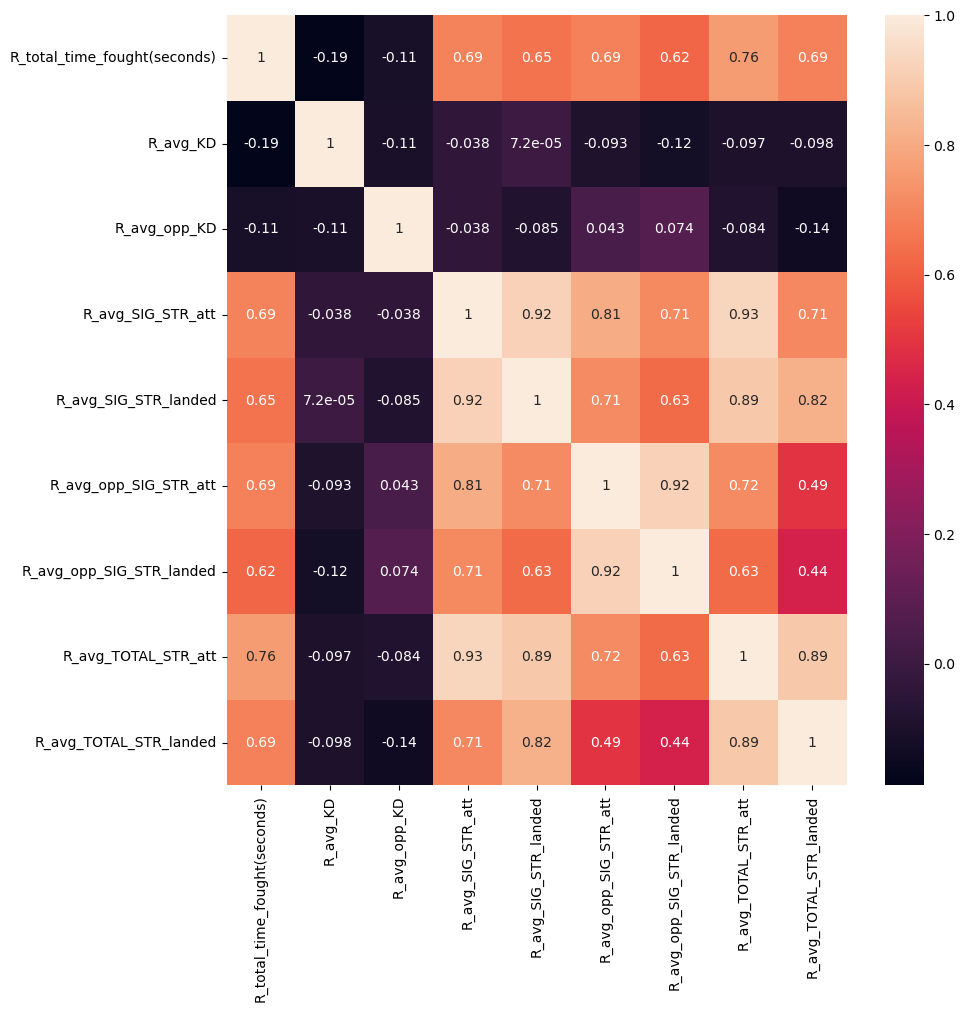

In [13]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

## Coefficients such as -0.11 for 'R_avg_opp_KD' & 'R_total_time_fought(seconds)' indicate a very weak relationship between the two variables. 
## However, coefficients such as 0.76 for 'R_total_time_fought(seconds)' & 'R_avg_TOTAL_STR_att' indicated a strong positive relationship between the two variables.

# Scatterplots

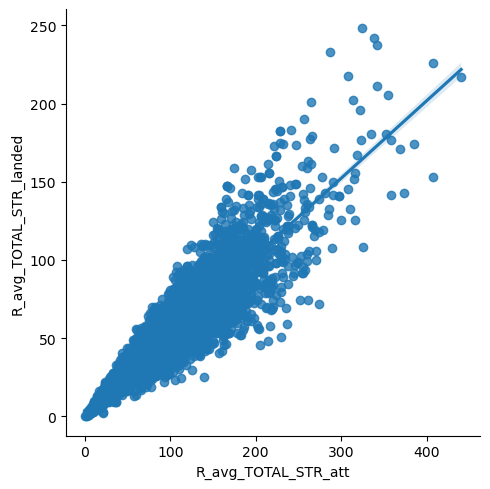

In [14]:
# Create a scatterplot for the 'R_avg_TOTAL_STR_att' and 'R_avg_TOTAL_STR_landed' columns in seaborn

sns.lmplot(x = 'R_avg_TOTAL_STR_att', y = 'R_avg_TOTAL_STR_landed', data = sub)

## The correlation between these two variables was 0.89 and we can see that the majority of the data points follow the trend of the correlation. There are also very few outliers from the trend line. We can now determine that there is indeed a strong positive relationship between these variables so as R_ave_TOTAL_STR_att increases so does R_avg_TOTAL_STR_landed'.

# Pair Plot

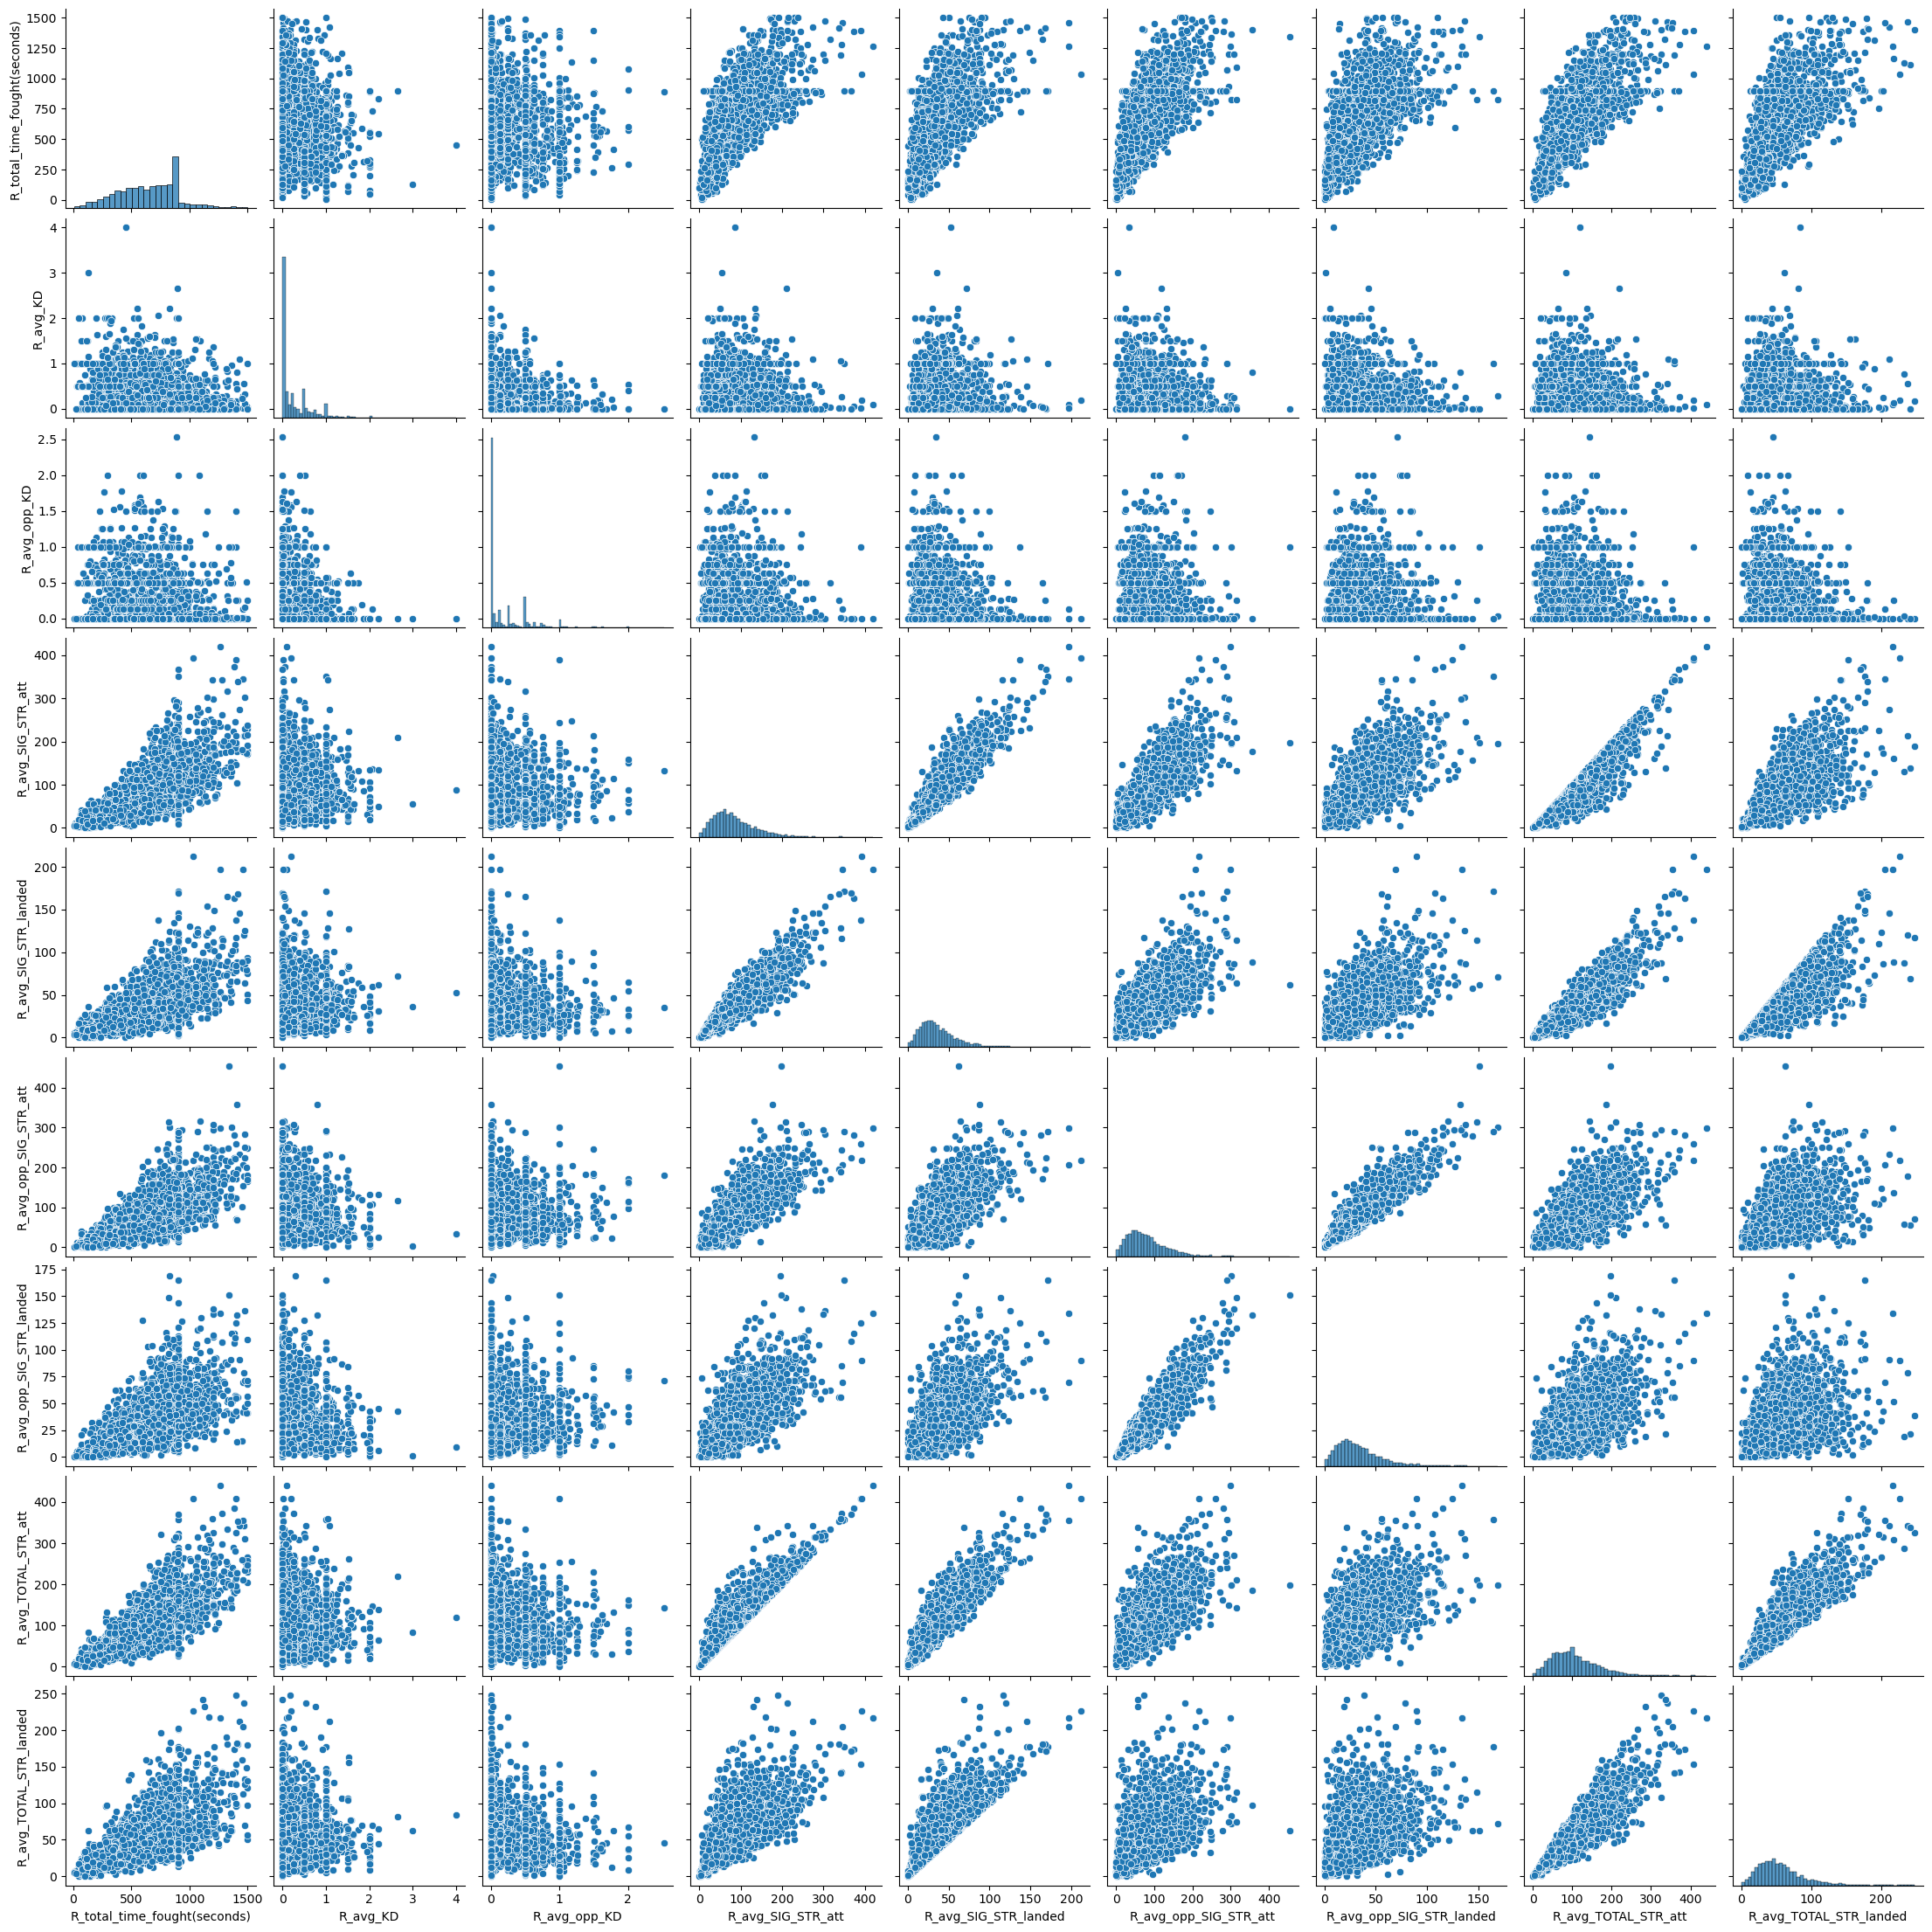

In [15]:
# Create a pair plot of the entire sub dataframe

g = sns.pairplot(sub)

## Some of the variables I would like to investigate further are 'R_avg_TOTAL_STR_att' & 'R_avg_SIG_STR_att' since there seems to be a strong relationship.

# Categorical Plot

### Creating a categorical variable that splits the "Weight" column into categories

<Axes: xlabel='R_Weight_lbs', ylabel='Count'>

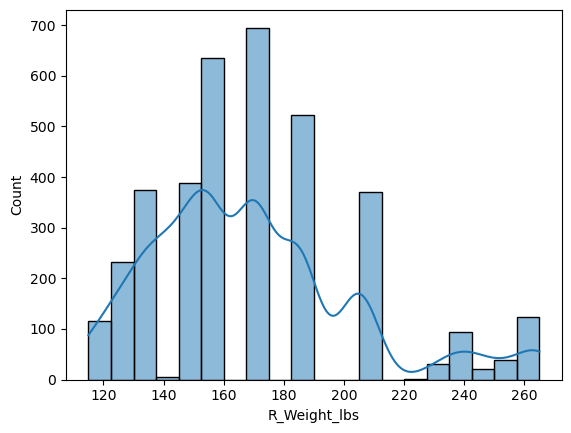

In [16]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_merged['R_Weight_lbs'], bins = 20, kde = True)

In [17]:
df_merged.loc[df_merged['R_Weight_lbs'] < 150, 'Weight category'] = 'Low weight'

In [18]:
df_merged.loc[(df_merged['R_Weight_lbs'] >= 150) & (df_merged['R_Weight_lbs'] < 220), 'Weight category'] = 'Middle weight'

In [19]:
df_merged.loc[df_merged['R_Weight_lbs'] >= 220, 'Weight category'] = 'High weight'

In [20]:
df_merged['Weight category'].value_counts(dropna = False)

Middle weight    2222
Low weight       1115
High weight       308
Name: Weight category, dtype: int64

In [21]:
df_merged.columns

Index(['R_fighter', 'B_fighter', 'Referee_x', 'date_x', 'location', 'Winner_x',
       'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD',
       ...
       'Format', 'Referee_y', 'date_y', 'Year', 'City', 'State', 'Country',
       'Fight_type', 'Winner_y', 'Weight category'],
      dtype='object', length=187)

In [22]:
df_merged.head()

,R_fighter,B_fighter,Referee_x,date_x,location,Winner_x,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_REV,B_REV,R_CTRL,B_CTRL,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee_y,date_y,Year,City,State,Country,Fight_type,Winner_y,Weight category
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000000,0.000,0.420000,0.495000,0.330000,0.360000,0.500000,1.0000,0.000000,0.00,50.000000,20.000000,84.000000,45.000000,76.500000,41.000000,114.000000,64.000000,1.500000,1.000000,9.000000,6.500000,39.500000,11.000000,63.000000,27.500000,7.500000,7.000000,12.00000,9.000000,3.000000,2.000000,9.000000,8.500000,35.000000,12.500000,43.500000,17.500000,10.50000,4.500000,4.000000,3.000000,4.50000,3.000000,36.500000,24.500000,34.000000,277.500000,531.50000,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135.0,1.00000,0.000000,0.500000,0.460000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.000000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.000000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.00000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0

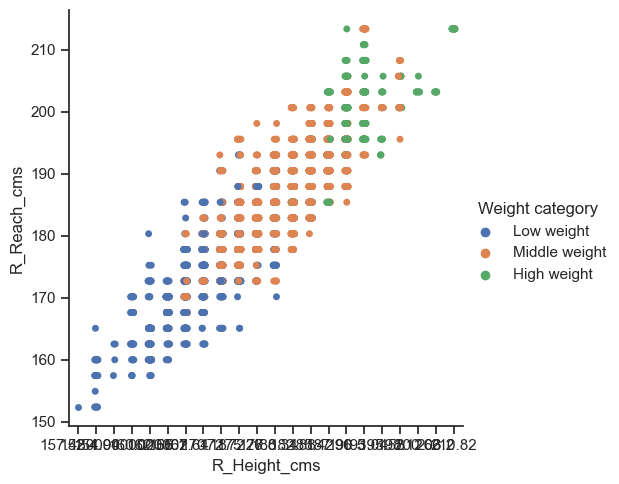

In [23]:
# Create a categorical plot in seaborn using the weight categories created above

sns.set(style="ticks")
g = sns.catplot(x="R_Height_cms", y="R_Reach_cms", hue="Weight category", data=df_merged)

In [24]:
#current dir
cwd = os.getcwd()
cwd

'/Users/tyrasmussen/Desktop/08-2023 UFC Analysis/03 Scripts'

In [25]:
# fig = g.get_figure()
g.savefig("out.png")

## As expected, the fighters in the low weight category have lower reaches and heights and fighters in the high weight category have the highest heights and reaches.

# 05. Revisiting Questions

## Questions defined at the beginning of the project:

### 1. What are the key factors for winners in UFC fights for each weight division?
### 2. Does the location of the fight have a factor in how long fights are or in strategy?
### 3. How should one prepare for a fight, such as what weight is the optimal weight in each class?

### We have not done any spatial analyses yet so question 2 still needs further research. Also, in order to answer question 1, we must split the 'R' and 'B' columns into columns separated by the Winner and Loser of each fight. This will be done in future steps of the project. For question 3, it will also be necessary to get winner and loser data for each column.

### Two new questions that I would like to further investigate are:

### - Does age have a factor for strategy in fights?
### - How does a fighter's stance affect their strategy in the fight?

# 06. Hypotheses

## Hypotheses that I would like to investigate in future steps:

### If a fighter is in a heavier weight class, then there will be more significant strikes than someone who is in a lighter weight class.
### If a fight is in a lighter weight class, then the fight will go more rounds than heavier weight classes.
### If a new fighter wants to be prepared for their next fight, then they must have a focus on having a high percentage of strikes landed to the head as missing a strike leaves you vulnerable to opponent strikes.

# 07. Export Dataframe

In [37]:
# Export data to pkl
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_weight.pkl'))

In [38]:
df_additional.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_additional_final.pkl'))